# Лабораторная работа №1.

По курсу "Нейронные сети глубокого обучения"

Выполнили студенты группы 6131:
- Смирнов И.Д.
- Матюшкина И.В.

## Задание:
Для любителей прекрасного. Релизовать нейронную сеть, которая будет являться классификатором для датасета представленного ниже. 

### Датасет:

https://www.kaggle.com/alxmamaev/flowers-recognition


### О датасете:

Этот набор данных содержит 4242 изображения цветов.
Сбор данных основан на данных flicr, google images, yandex images.
Вы можете использовать этот набор данных, чтобы распознавать растения на фотографии.

#### Содержание датасета
Картинки разделены на пять классов: ромашки, тюльпаны, розы, подсолнухи, одуванчики.
На каждый класс около 800 фотографий. Фотографии не высокого разрешения, около 320х240 пикселей. Фотографии не уменьшены до единого размера, у них разные пропорции!

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ismirnov56","key":"4443d5196fd2eebbc7b62bc8b480d636"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 97% 217M/225M [00:02<00:00, 96.5MB/s]
100% 225M/225M [00:02<00:00, 83.4MB/s]


In [ ]:
!unzip flowers-recognition.zip

In [ ]:
root_data_path = 'flowers/'

In [ ]:
import os

CLASSES = os.listdir(root_data_path)

In [ ]:
FILES_MAPPING = {
    'sunflower': 'подсолнух',
    'dandelion': 'одуванчик',
    'daisy': 'маргаритка', 
    'tulip': 'тюльпан',
    'rose': 'роза'
}

In [ ]:
from PIL import Image
import numpy
import cv2
IMAGE_DIM = 150, 150


train = []  

for i in CLASSES:
    path = os.path.join(root_data_path, i)
    idx = CLASSES.index(i)
    for img_name in os.listdir(path):
        if img_name.endswith('.jpg'):
            img_array = cv2.imread(os.path.join(path, img_name), cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(RGB_img, IMAGE_DIM)
            train.append([img_array, idx])

In [ ]:
X=[] #Training images
y=[] #labels
for i,j in train:
    X.append(i)
    y.append(j)

In [ ]:
del train

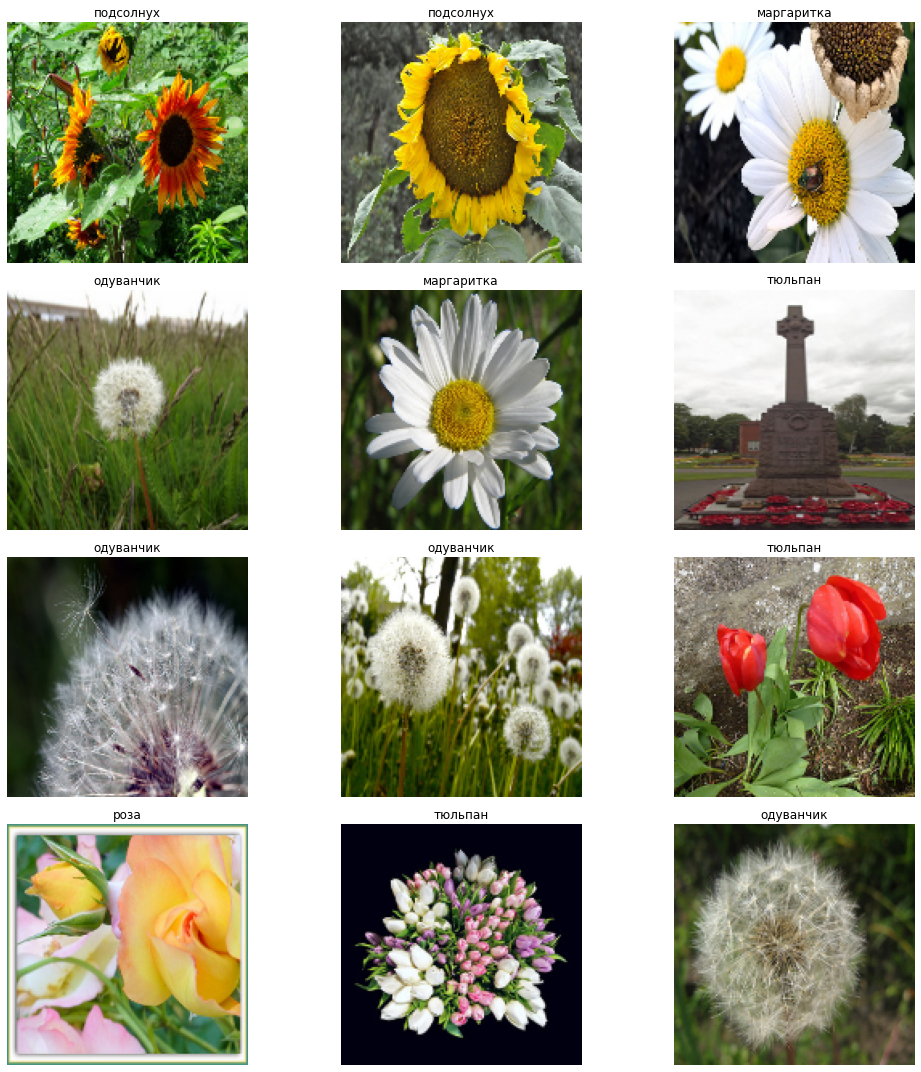

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

ROWS = 4
COLS = 3

fig,ax = plt.subplots(ROWS, COLS)
fig.set_size_inches(15,15)

for i in range(ROWS):
    for j in range(COLS):
        l = np.random.randint(0, len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title(FILES_MAPPING[CLASSES[y[l]]])
        ax[i,j].axis('off')        
plt.tight_layout()

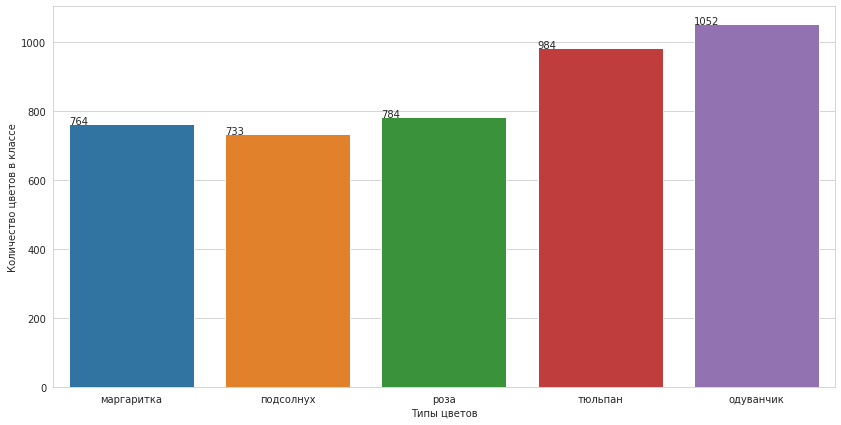

In [ ]:
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize = (14,7))
fig = sns.countplot(x = y)
fig.set(xticks = range(len(CLASSES)), xticklabels = [FILES_MAPPING[i] for i in CLASSES])
plt.xlabel('Типы цветов')
plt.ylabel('Количество цветов в классе')

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()), (p.get_x(), p.get_height()))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

from keras import Input
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Activation, Dense
import numpy as np

In [ ]:
X = np.array(X).reshape(-1,*IMAGE_DIM,3)/255.0

y = to_categorical(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3453, 150, 150, 3), (3453, 5), (864, 150, 150, 3), (864, 5))

In [ ]:
x_train_perseptron = x_train.reshape(-1,IMAGE_DIM[0]*IMAGE_DIM[1]*3)
x_test_perseptron = x_test.reshape(-1,IMAGE_DIM[0]*IMAGE_DIM[1]*3)

x_train_perseptron.shape, x_test_perseptron.shape

((3453, 67500), (864, 67500))

In [ ]:
EPOCHS = 40
BATCH_SIZE = 128
NUM_TRAINING_IMAGES = x_train.shape[0]
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

In [ ]:
cnn = Sequential([
      Conv2D(64, (3, 3), input_shape=(*IMAGE_DIM, 3)),
      Activation("relu"),
      MaxPooling2D(2, 2, padding="same"),
      Dropout(0.2),
      
      Conv2D(128, (3, 3)),
      Activation("relu"),
      MaxPooling2D(2, 2, padding="same"),
      Dropout(0.2),
      
      Conv2D(128, (3, 3)),
      Activation("relu"),
      MaxPooling2D(2, 2, padding="same"),
      Dropout(0.2),

      Conv2D(256, (3, 3)),
      Activation("relu"),
      MaxPooling2D(2, 2, padding="same"),
      Dropout(0.2),

      Conv2D(256, (3, 3)),
      Activation("relu"),
      MaxPooling2D(2, 2, padding="same"),
      Dropout(0.2),
      
      Flatten(),
      Dense(512, activation="relu"),
      Dropout(0.2),
      Dense(5, activation="softmax")
])
plot_model(cnn, show_shapes=True, show_layer_names=True)
cnn.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
cnn_history = cnn.fit(x_train, y_train, epochs=EPOCHS, verbose = 1, validation_data = (x_test,y_test), steps_per_epoch = STEPS_PER_EPOCH).history
print(cnn_history)
cnn_results = cnn.evaluate(x_test, y_test, batch_size = BATCH_SIZE)
print("Validation loss, accuracy:", cnn_results)

Epoch 1/40
26/26 [==============================] - 22s 350ms/step - loss: 1.5209 - accuracy: 0.2997 - val_loss: 1.2613 - val_accuracy: 0.4410
Epoch 2/40
26/26 [==============================] - 6s 226ms/step - loss: 1.2215 - accuracy: 0.4408 - val_loss: 1.1641 - val_accuracy: 0.5208
Epoch 3/40
26/26 [==============================] - 6s 228ms/step - loss: 1.1292 - accuracy: 0.5193 - val_loss: 1.0817 - val_accuracy: 0.5625
Epoch 4/40
26/26 [==============================] - 6s 228ms/step - loss: 1.0531 - accuracy: 0.5610 - val_loss: 1.0353 - val_accuracy: 0.6215
Epoch 5/40
26/26 [==============================] - 6s 223ms/step - loss: 0.9732 - accuracy: 0.6076 - val_loss: 0.9252 - val_accuracy: 0.6539
Epoch 6/40
26/26 [==============================] - 6s 230ms/step - loss: 0.9247 - accuracy: 0.6334 - val_loss: 0.9188 - val_accuracy: 0.6528
Epoch 7/40
26/26 [==============================] - 6s 229ms/step - loss: 0.8698 - accuracy: 0.6638 - val_loss: 0.8404 - val_accuracy: 0.6806
Epoch

In [ ]:
predictions = cnn.predict_generator(x_test, steps=STEPS_PER_EPOCH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


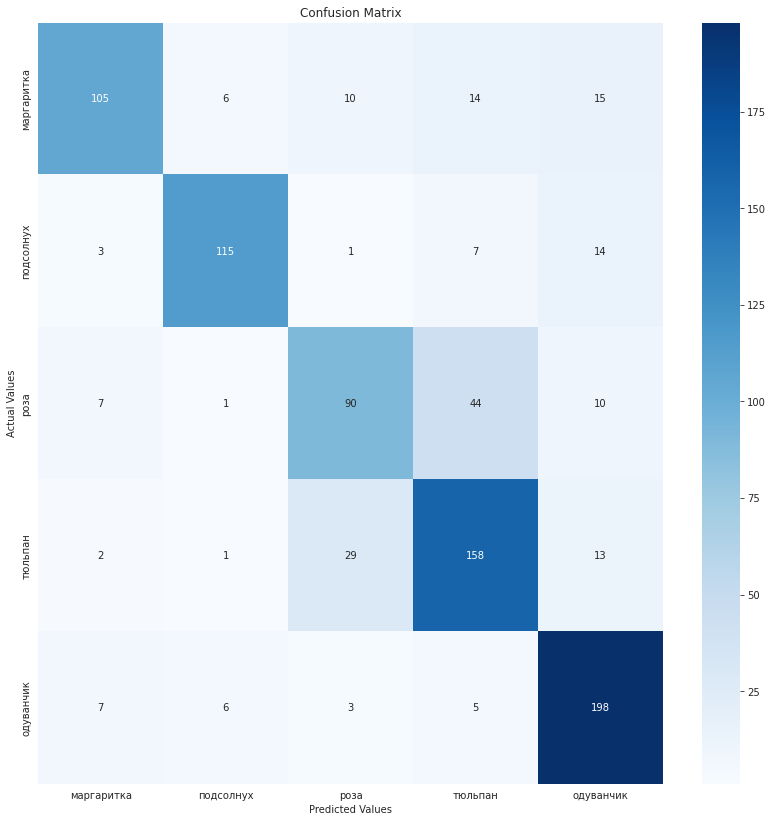

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_classes = numpy.argmax(predictions, axis=1)
label_classes = numpy.argmax(y_test, axis=1)
cm = confusion_matrix(label_classes, predicted_classes)
plt.figure(figsize = (14,14))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([FILES_MAPPING[i] for i in CLASSES])
ax.yaxis.set_ticklabels([FILES_MAPPING[i] for i in CLASSES])

## Display the visualization of the Confusion Matrix.
plt.show()

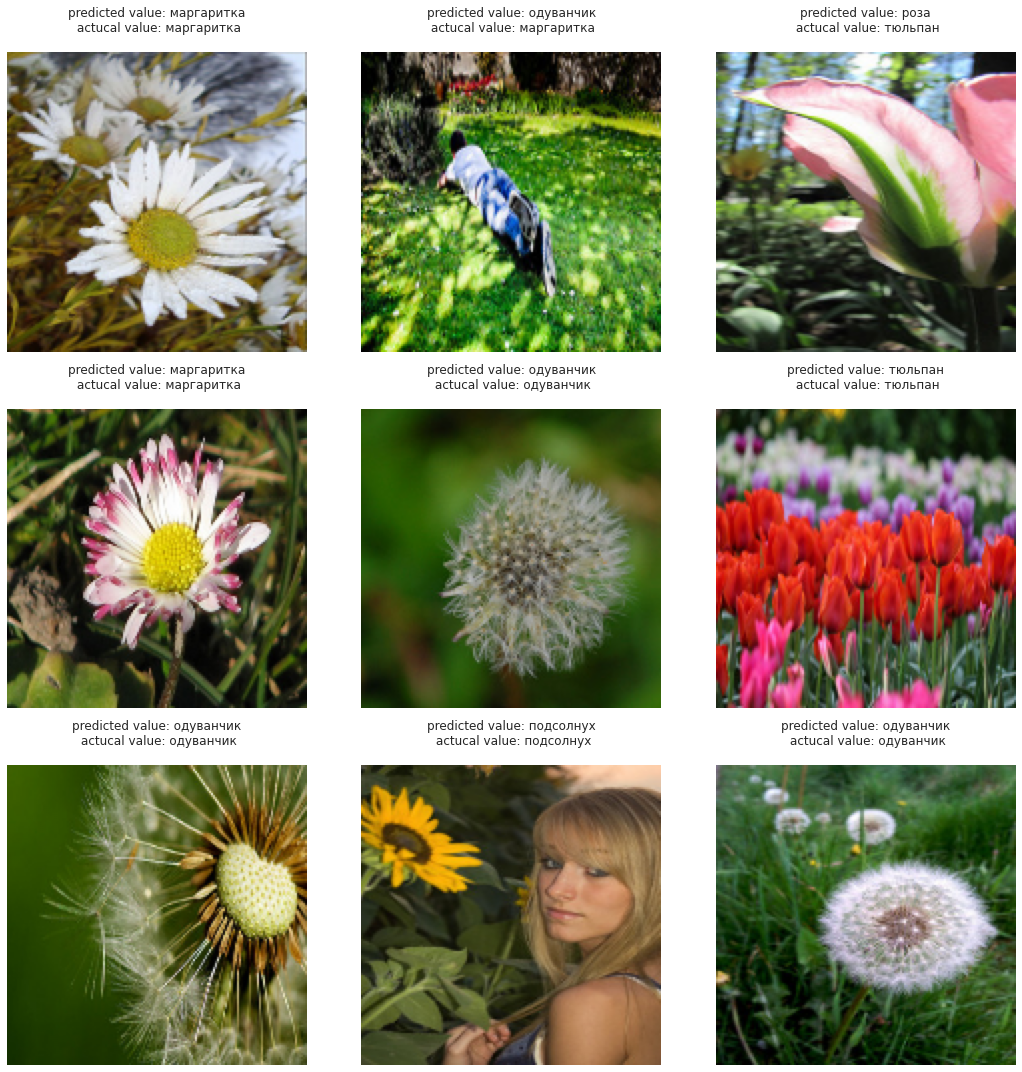

In [ ]:
predicted_classes = numpy.argmax(predictions, axis=1)
label_classes = numpy.argmax(y_test, axis=1)

fig,ax = plt.subplots(3, 3)
fig.set_size_inches(15,15)

for i in range(3):
    for j in range(3):
        l = np.random.randint(0, len(label_classes))
        ax[i,j].imshow(x_test[l])
        ax[i,j].set_title(f'predicted value: {FILES_MAPPING[CLASSES[predicted_classes[l]]]}\n actucal value: {FILES_MAPPING[CLASSES[label_classes[l]]]}\n')
        ax[i,j].axis('off')        
plt.tight_layout()

In [ ]:
perseptron = Sequential([
      Dense(512, activation="relu", input_shape=(IMAGE_DIM[0]*IMAGE_DIM[1]*3,)),
      Dense(512, activation="relu"),
      Dense(5, activation="softmax")
])
plot_model(perseptron, show_shapes=True, show_layer_names=True)
perseptron.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
perseptron_history = perseptron.fit(x_train_perseptron, y_train, epochs=EPOCHS, verbose = 1, validation_data = (x_test_perseptron,y_test), steps_per_epoch = STEPS_PER_EPOCH).history
print(perseptron_history)
perseptron_results = perseptron.evaluate(x_test_perseptron, y_test, batch_size = BATCH_SIZE)
print("Validation loss, accuracy:", perseptron_results)

Epoch 1/40
26/26 [==============================] - 2s 50ms/step - loss: 19.6701 - accuracy: 0.2433 - val_loss: 3.4334 - val_accuracy: 0.4051
Epoch 2/40
26/26 [==============================] - 1s 34ms/step - loss: 2.3533 - accuracy: 0.3606 - val_loss: 2.6831 - val_accuracy: 0.3495
Epoch 3/40
26/26 [==============================] - 1s 34ms/step - loss: 1.9616 - accuracy: 0.3788 - val_loss: 1.5827 - val_accuracy: 0.4225
Epoch 4/40
26/26 [==============================] - 1s 33ms/step - loss: 1.3138 - accuracy: 0.4686 - val_loss: 1.2757 - val_accuracy: 0.4792
Epoch 5/40
26/26 [==============================] - 1s 33ms/step - loss: 1.2308 - accuracy: 0.4938 - val_loss: 1.2649 - val_accuracy: 0.4595
Epoch 6/40
26/26 [==============================] - 1s 39ms/step - loss: 1.1301 - accuracy: 0.5413 - val_loss: 1.3825 - val_accuracy: 0.4398
Epoch 7/40
26/26 [==============================] - 1s 33ms/step - loss: 1.3723 - accuracy: 0.4761 - val_loss: 1.8560 - val_accuracy: 0.3912
Epoch 8/40
2

In [ ]:
predictions = perseptron.predict_generator(x_test_perseptron, steps=STEPS_PER_EPOCH)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


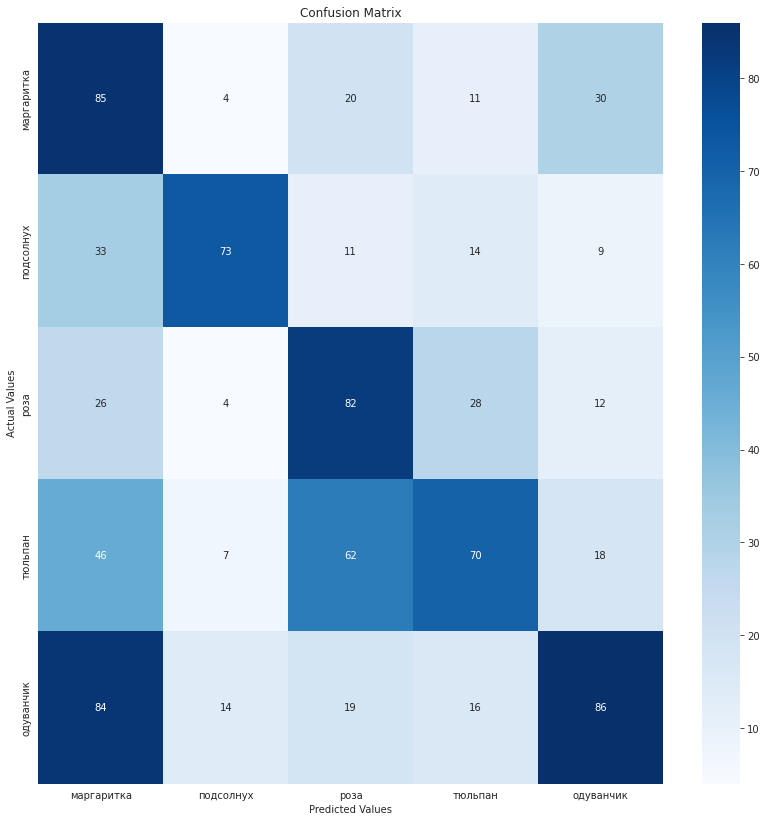

In [ ]:
predicted_classes = numpy.argmax(predictions, axis=1)
label_classes = numpy.argmax(y_test, axis=1)
cm = confusion_matrix(label_classes, predicted_classes)
plt.figure(figsize = (14,14))
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([FILES_MAPPING[i] for i in CLASSES])
ax.yaxis.set_ticklabels([FILES_MAPPING[i] for i in CLASSES])

## Display the visualization of the Confusion Matrix.
plt.show()

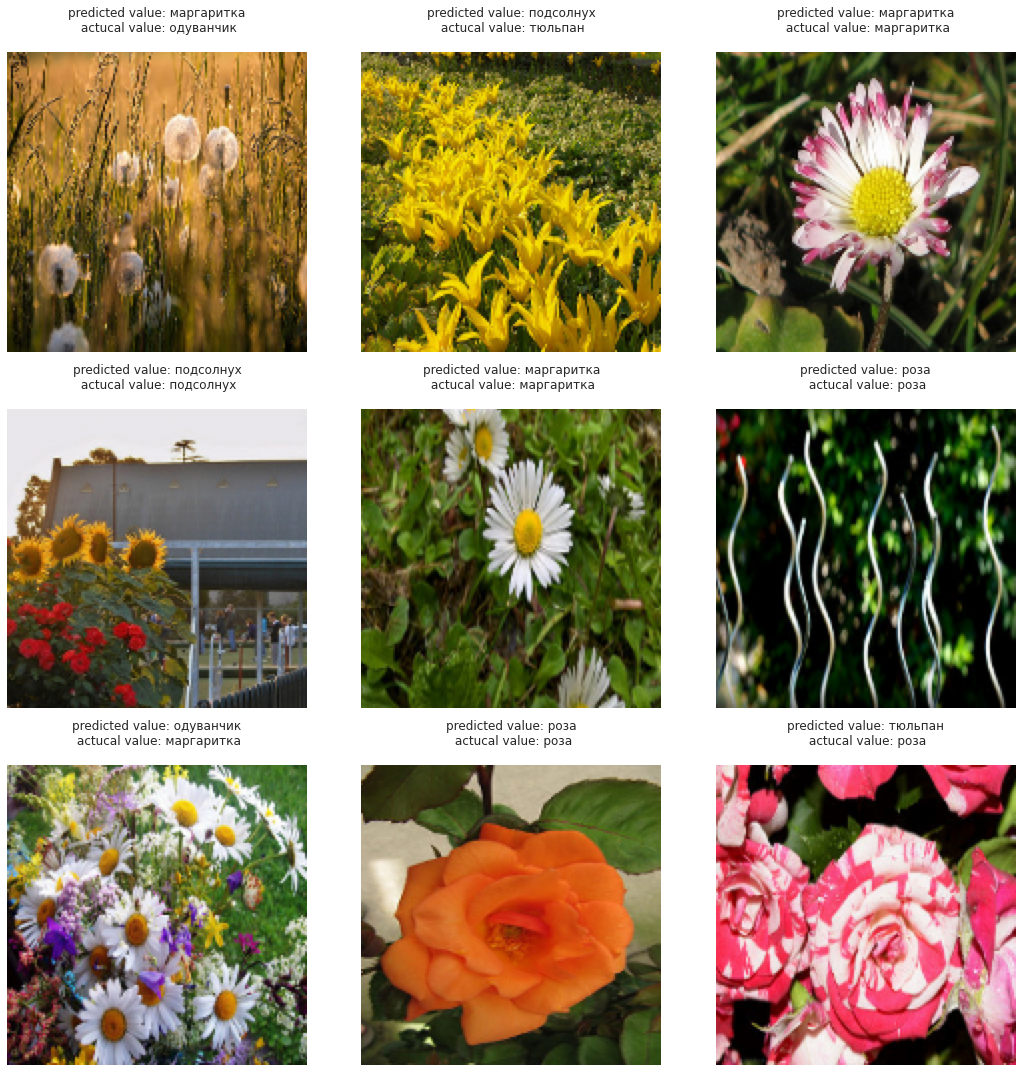

In [ ]:
predicted_classes = numpy.argmax(predictions, axis=1)
label_classes = numpy.argmax(y_test, axis=1)

fig,ax = plt.subplots(3, 3)
fig.set_size_inches(15,15)

for i in range(3):
    for j in range(3):
        l = np.random.randint(0, len(label_classes))
        ax[i,j].imshow(x_test[l])
        ax[i,j].set_title(f'predicted value: {FILES_MAPPING[CLASSES[predicted_classes[l]]]}\n actucal value: {FILES_MAPPING[CLASSES[label_classes[l]]]}\n')
        ax[i,j].axis('off')        
plt.tight_layout()

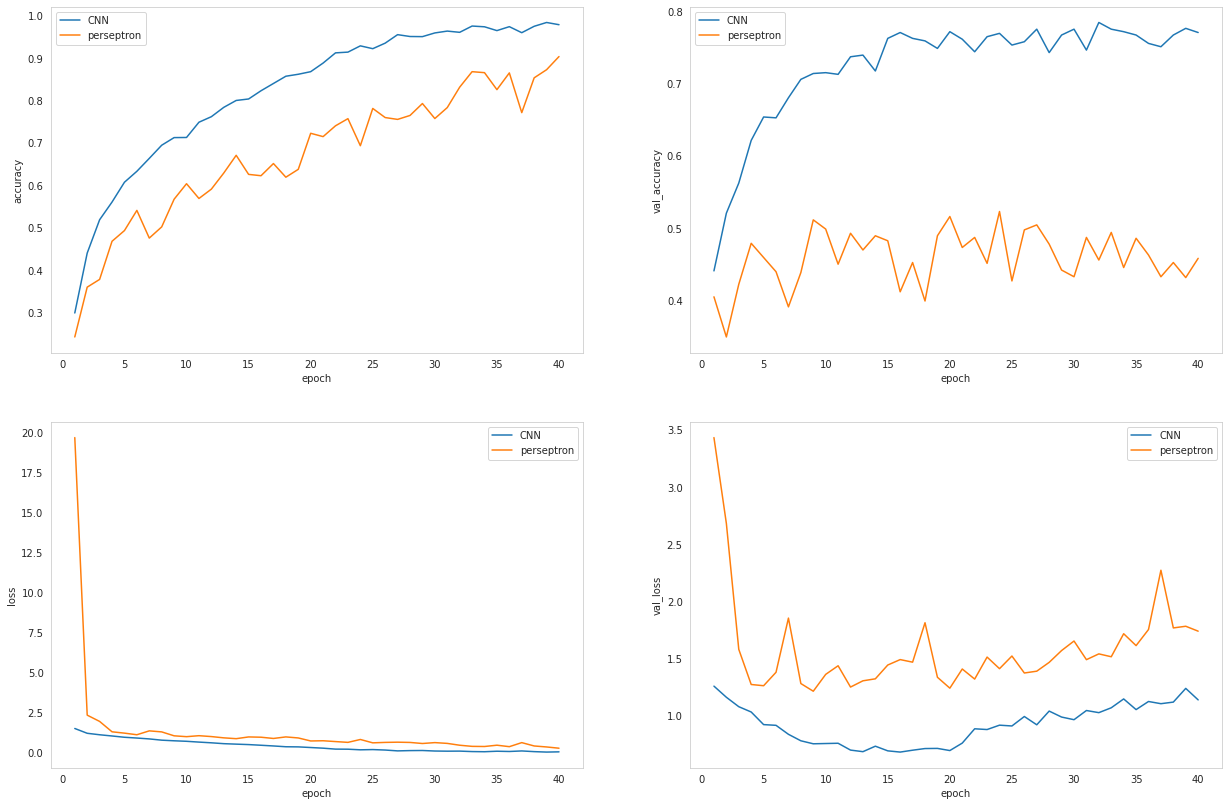

In [ ]:
import matplotlib.pyplot as plt

epoch_range = list(range(1,41))

figure, axis = plt.subplots(2, 2, figsize=(21, 14))

plots_map = {
    'accuracy': axis[0, 0],
    'val_accuracy': axis[0, 1],
    'loss': axis[1, 0],
    'val_loss': axis[1, 1]
}

for attr, value in plots_map.items():
    value.plot(epoch_range, cnn_history[attr], label='CNN')
    value.plot(epoch_range, perseptron_history[attr], label='perseptron')
    value.set_ylabel(attr)
    value.set_xlabel('epoch')
    value.legend()
    value.grid()

plt.show()